# Colour Analysis
**Author:** Christian Byron  **Date:** 31-Mar-21

This demo looks at colour analysis and changes in thresholds for a given image

- [ ] See if we can cache the uploaded files and add a dropdown box to Step 1 to retrieve past files

---

#### Step 1 - Load and/or select a given image

In [2]:
import ipywidgets as widgets

uploader = widgets.FileUpload()
display(uploader)

FileUpload(value={}, description='Upload')

#### Step 2 - Show the original file

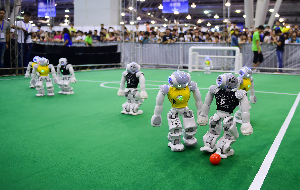

In [10]:
import io
from PIL import Image

uploaded_filename = next(iter(uploader.value))
content = uploader.value[uploaded_filename]['content'] 

#widgets.Image(value=content)
img = Image.open(io.BytesIO(content)).resize((300,190))
img

#### Step 3 -Setup the GUI
- [ ] Make the size of the three images dynamic based on calculations from the file size ( held in uploader )

In [5]:
image_area_original  = widgets.Image(value=content,width=300,height=190)
image_area_colour_channel = widgets.Image(value=content,width=300,height=190)
image_area_binarized = widgets.Image(value=content,width=300,height=190)

dropdown = widgets.Dropdown(
    options= [('Red',0),('Green',1),('Blue',2)],
    description='Convert to:',
    disabled=False,
)

slider = widgets.IntRangeSlider(
    min=0,
    max=255,
    step=1,
    description='Thresholds:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',
    layout=widgets.Layout(width='70%')
)

widgets.VBox([widgets.HBox([dropdown, slider]), 
              widgets.HBox([image_area_original,image_area_colour_channel,image_area_binarized])])


#### Step 4 -  Enable Dropdown to extract the colour channel of the image

In [6]:
import io
from PIL import Image

def on_dropdown_value_change(change):
    img = Image.open(io.BytesIO(image_area_original.value))
    img_channel = img.getchannel(change['new'])
    
    buffer = io.BytesIO()
    img_channel.save(buffer, format='JPEG')
    
    image_area_colour_channel.value = buffer.getvalue()
    
dropdown.observe(on_dropdown_value_change, names='value')

#### Step 5 - Enable Slider to select thresholds

In [7]:
def update_binarized_image(upper_threshold, lower_threshold):
    img = Image.open(io.BytesIO(image_area_colour_channel.value))
    
    fn = lambda x : 0 if x > lower_threshold or x < upper_threshold else 255
    img_binarized = img.point(fn, mode='1')
    
    buffer = io.BytesIO()
    img_binarized.save(buffer, format='JPEG')
    
    image_area_binarized.value = buffer.getvalue()

def on_slider_value_change(change):
    update_binarized_image(change['new'][0], change['new'][1])
    
slider.observe(on_slider_value_change, names='value')

#### Lessons Learnt
- Some ways to use PIL library for image manipulation and display in ipyWidgets Image widget class. Initially the Image widget works seemlessly with the File Uploader widget so worthwile keeping
- Learnt some PIL Image functions (convert, point, getchannel) 
